In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# read data and add column names
data=pd.read_csv("./adult.data",header=None)
data.columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
data.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# check for null values
data.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [5]:
# delete lines with '?'
data.replace(' ?', np.nan,inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  int64 
 3   education        30162 non-null  object
 4   educational-num  30162 non-null  int64 
 5   marital-status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   gender           30162 non-null  object
 10  capital-gain     30162 non-null  int64 
 11  capital-loss     30162 non-null  int64 
 12  hours-per-week   30162 non-null  int64 
 13  native-country   30162 non-null  object
 14  income           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# remove duplicate rows
print("Before removing duplicates:", data.duplicated().sum())
data = data[~data.duplicated()]
print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 23
After removing duplicates: 0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30139 non-null  int64 
 1   workclass        30139 non-null  object
 2   fnlwgt           30139 non-null  int64 
 3   education        30139 non-null  object
 4   educational-num  30139 non-null  int64 
 5   marital-status   30139 non-null  object
 6   occupation       30139 non-null  object
 7   relationship     30139 non-null  object
 8   race             30139 non-null  object
 9   gender           30139 non-null  object
 10  capital-gain     30139 non-null  int64 
 11  capital-loss     30139 non-null  int64 
 12  hours-per-week   30139 non-null  int64 
 13  native-country   30139 non-null  object
 14  income           30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data['income'].value_counts()

 <=50K    22633
 >50K      7506
Name: income, dtype: int64

In [9]:
# apply data normalisation to int64 variables
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
for col in numeric_cols:
    data[col] = scaler.fit_transform(data[[col]])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30139 non-null  float64
 1   workclass        30139 non-null  object 
 2   fnlwgt           30139 non-null  float64
 3   education        30139 non-null  object 
 4   educational-num  30139 non-null  float64
 5   marital-status   30139 non-null  object 
 6   occupation       30139 non-null  object 
 7   relationship     30139 non-null  object 
 8   race             30139 non-null  object 
 9   gender           30139 non-null  object 
 10  capital-gain     30139 non-null  float64
 11  capital-loss     30139 non-null  float64
 12  hours-per-week   30139 non-null  float64
 13  native-country   30139 non-null  object 
 14  income           30139 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# encoding of integer values for object categories
class_le = LabelEncoder()
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in cat_cols:
    data[col] = class_le.fit_transform(data[col].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30139 non-null  float64
 1   workclass        30139 non-null  int32  
 2   fnlwgt           30139 non-null  float64
 3   education        30139 non-null  int32  
 4   educational-num  30139 non-null  float64
 5   marital-status   30139 non-null  int32  
 6   occupation       30139 non-null  int32  
 7   relationship     30139 non-null  int32  
 8   race             30139 non-null  int32  
 9   gender           30139 non-null  int32  
 10  capital-gain     30139 non-null  float64
 11  capital-loss     30139 non-null  float64
 12  hours-per-week   30139 non-null  float64
 13  native-country   30139 non-null  int32  
 14  income           30139 non-null  int32  
dtypes: float64(6), int32(9)
memory usage: 2.6 MB


In [11]:
# split the data into features and target
features = data.drop('income', axis=1)
target = data['income']

In [12]:
# split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

0.8404114134041142

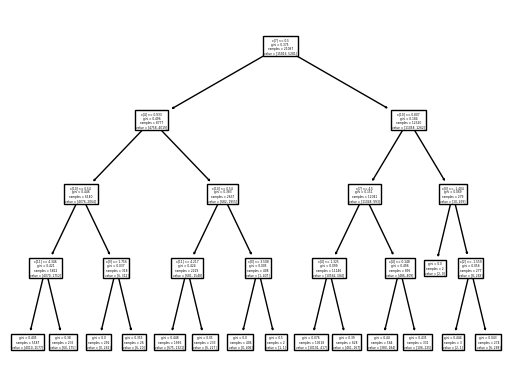

In [13]:
# do a test（train the decision tree model and evaluate the model on the test data）
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
tree_clf.fit(features_train, target_train)
plot_tree(tree_clf)
accuracy = tree_clf.score(features_test, target_test)
accuracy

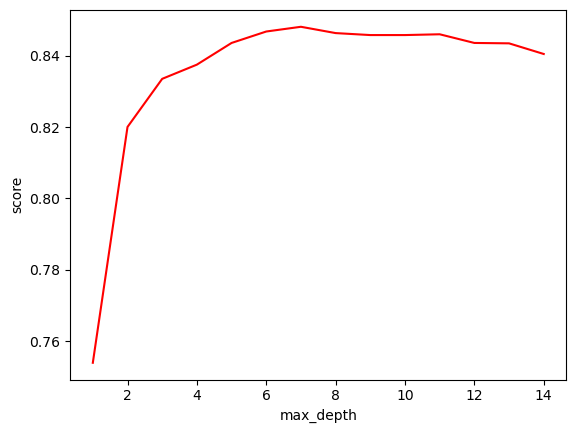

0.8481530634815306

In [14]:
# find the maximum accuracy when using the 'entropy' method
test_entropy = []
for i in range(14):
    tree_clf = DecisionTreeClassifier(criterion='entropy',  
                                      min_samples_leaf=2,
                                      max_depth=i+1)
    tree_clf = tree_clf.fit(features_train, target_train)
    score = tree_clf.score(features_test, target_test)
    test_entropy.append(score)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], test_entropy, color='red')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()
max(test_entropy)

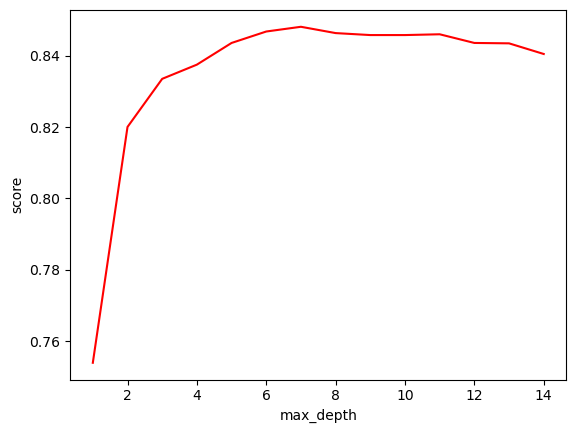

0.8487060384870604

In [15]:
# # find the maximum accuracy when using the 'gini' method
test_gini = []
for i in range(14):
    tree_clf = DecisionTreeClassifier(criterion='gini',  
                                      min_samples_leaf=2,
                                      max_depth=i+1)
    tree_clf = tree_clf.fit(features_train, target_train)
    score = tree_clf.score(features_test, target_test)
    test_gini.append(score)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], test_entropy, color='red')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()
max(test_gini)

In [16]:
# compare two methods for maximum accuracy
test = test_entropy + test_gini
accuracy = max(test)
accuracy

0.8487060384870604